### Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
from scipy.stats import zscore

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [6]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [8]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from warnings import filterwarnings
filterwarnings('ignore')

### Initial Data Exploration

In [10]:
df = pd.read_excel('customer_churn_data.xlsx', sheet_name='Data')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [12]:
# checking for duplicate records
df.duplicated().sum()

0

In [13]:
# null value check
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [14]:
# quick summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


**Note: Nearly 7 numerical features have more than 250 missing values. Analyzing their distribution will help us impute appropriate values.**

### Performing EDA

In [15]:
# numerical and object dtype variables
num = df.select_dtypes(include=["float","int"]).columns
obj = df.select_dtypes(exclude=["float","int"]).columns

In [16]:
# categorical variables
cat = ['CityTier','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','Complain']

In [17]:
# removing categorical variables from num and obj
num = [x for x in num if x not in cat]
obj = [x for x in obj if x not in cat]

### Numerical Variables Analysis

In [18]:
# distribution and boxplots
def distribution(x):
    fig,ax = plt.subplots(1,2,figsize=(12,4))
    sns.histplot(df[x], bins=20, ax=ax[0])
    ax[0].set_title('Distribution of {}'.format(x), fontsize=15)
    sns.boxplot(df[x], color='orange', ax=ax[1])
    ax[1].set_title('Boxplot of {}'.format(x), fontsize=15)
    plt.tight_layout()

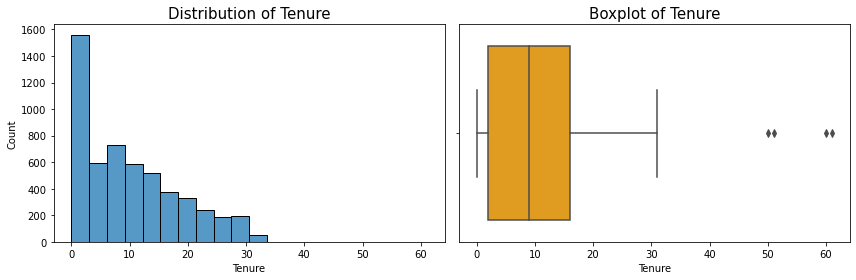

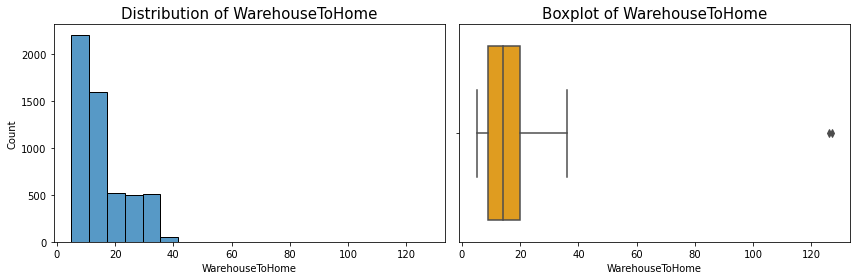

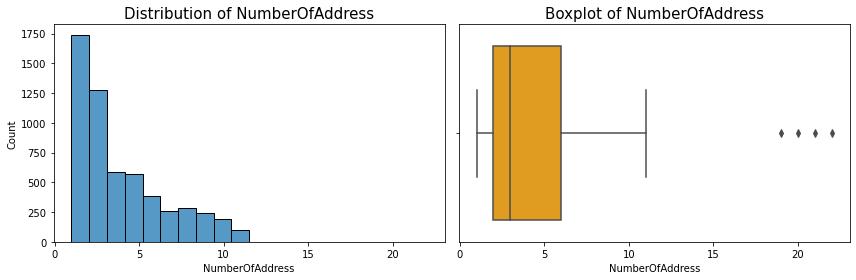

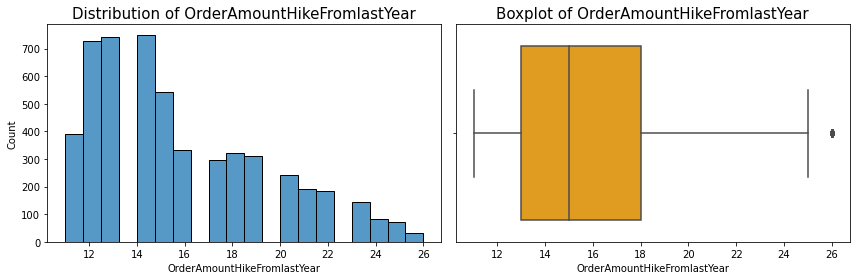

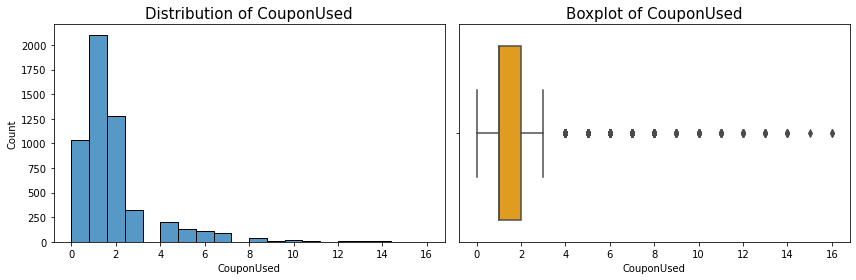

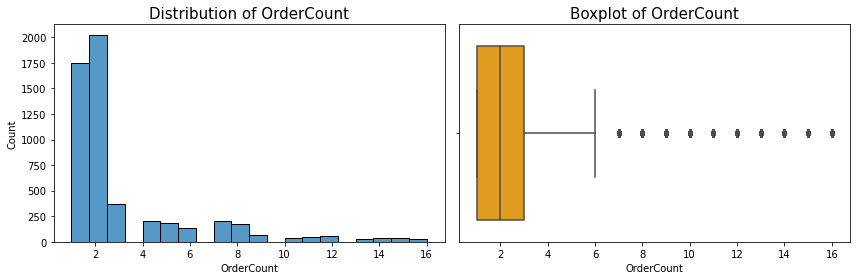

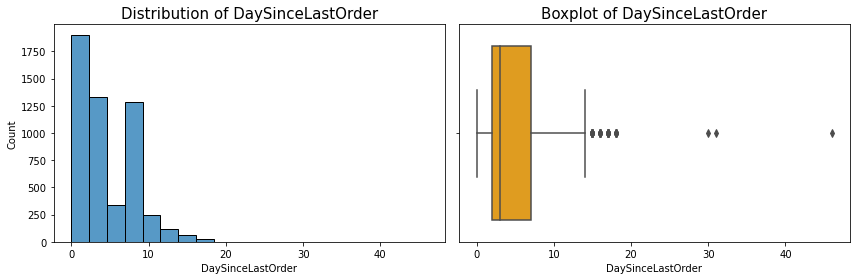

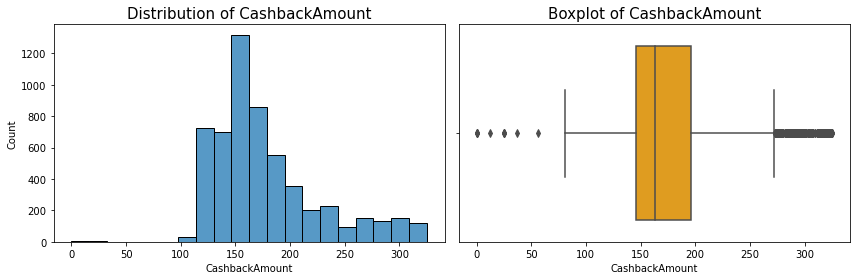

In [19]:
# numerical variables distribution
for i in num[2:]:
    distribution(i)

### Observations

- All the numerical variables have outliers and right skewed in thier distributions.
- Median value will be an appropriate value for imputation if any of these variables have missing values.

**Missing Values Imputation**

In [20]:
# num and cat variables with missing values
cols = df.isnull().sum()[df.isnull().sum()>0].index

In [21]:
miss_cat = 'HourSpendOnApp'
miss_num = [x for x in cols if x != miss_cat]

In [22]:
# imputing median for numerical variables
for i in miss_num:
    value = df[i].median()
    df[i] = df[i].fillna(value)

In [23]:
# null value check
df[num].isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
WarehouseToHome                0
NumberOfAddress                0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

### Categorical Variables Analysis

In [24]:
# imputing mode for categorical variables
value = df['HourSpendOnApp'].mode()[0]
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(value)

In [25]:
# dtype adjustment
df['HourSpendOnApp'] = df['HourSpendOnApp'].astype('float').astype('int64')

In [26]:
for i in cat:
    print("No.of.categories: {}".format(df[i].nunique()))
    print("")
    print(df[i].value_counts())
    print("---------------------------------")
    print("")

No.of.categories: 3

1    3666
3    1722
2     242
Name: CityTier, dtype: int64
---------------------------------

No.of.categories: 6

3    2942
2    1471
4    1176
1      35
0       3
5       3
Name: HourSpendOnApp, dtype: int64
---------------------------------

No.of.categories: 6

4    2377
3    1699
5     881
2     276
1     235
6     162
Name: NumberOfDeviceRegistered, dtype: int64
---------------------------------

No.of.categories: 5

3    1698
1    1164
5    1108
4    1074
2     586
Name: SatisfactionScore, dtype: int64
---------------------------------

No.of.categories: 2

0    4026
1    1604
Name: Complain, dtype: int64
---------------------------------



In [27]:
for i in obj:
    print("No.of.categories: {}".format(df[i].nunique()))
    print("")
    print(df[i].value_counts())
    print("---------------------------------")
    print("")

No.of.categories: 3

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
---------------------------------

No.of.categories: 7

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
---------------------------------

No.of.categories: 2

Male      3384
Female    2246
Name: Gender, dtype: int64
---------------------------------

No.of.categories: 6

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64
---------------------------------

No.of.categories: 3

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64
---------------------------------



In [28]:
# preferred login device variable
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Mobile Phone','Phone')

In [29]:
# preferred payment mode variable
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('CC', 'Credit Card')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('Cash on Delivery', 'COD')

In [30]:
# preferred order category variable
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile','Mobile Phone')

In [31]:
# label encoding 
for i in obj:
    df[i] = pd.Categorical(df[i]).codes
    df[i] = df[i].astype('int64')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   int64  
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   int64  
 7   Gender                       5630 non-null   int64  
 8   HourSpendOnApp               5630 non-null   int64  
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   int64  
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   int64  
 13  NumberOfAddress   

### Pairplot

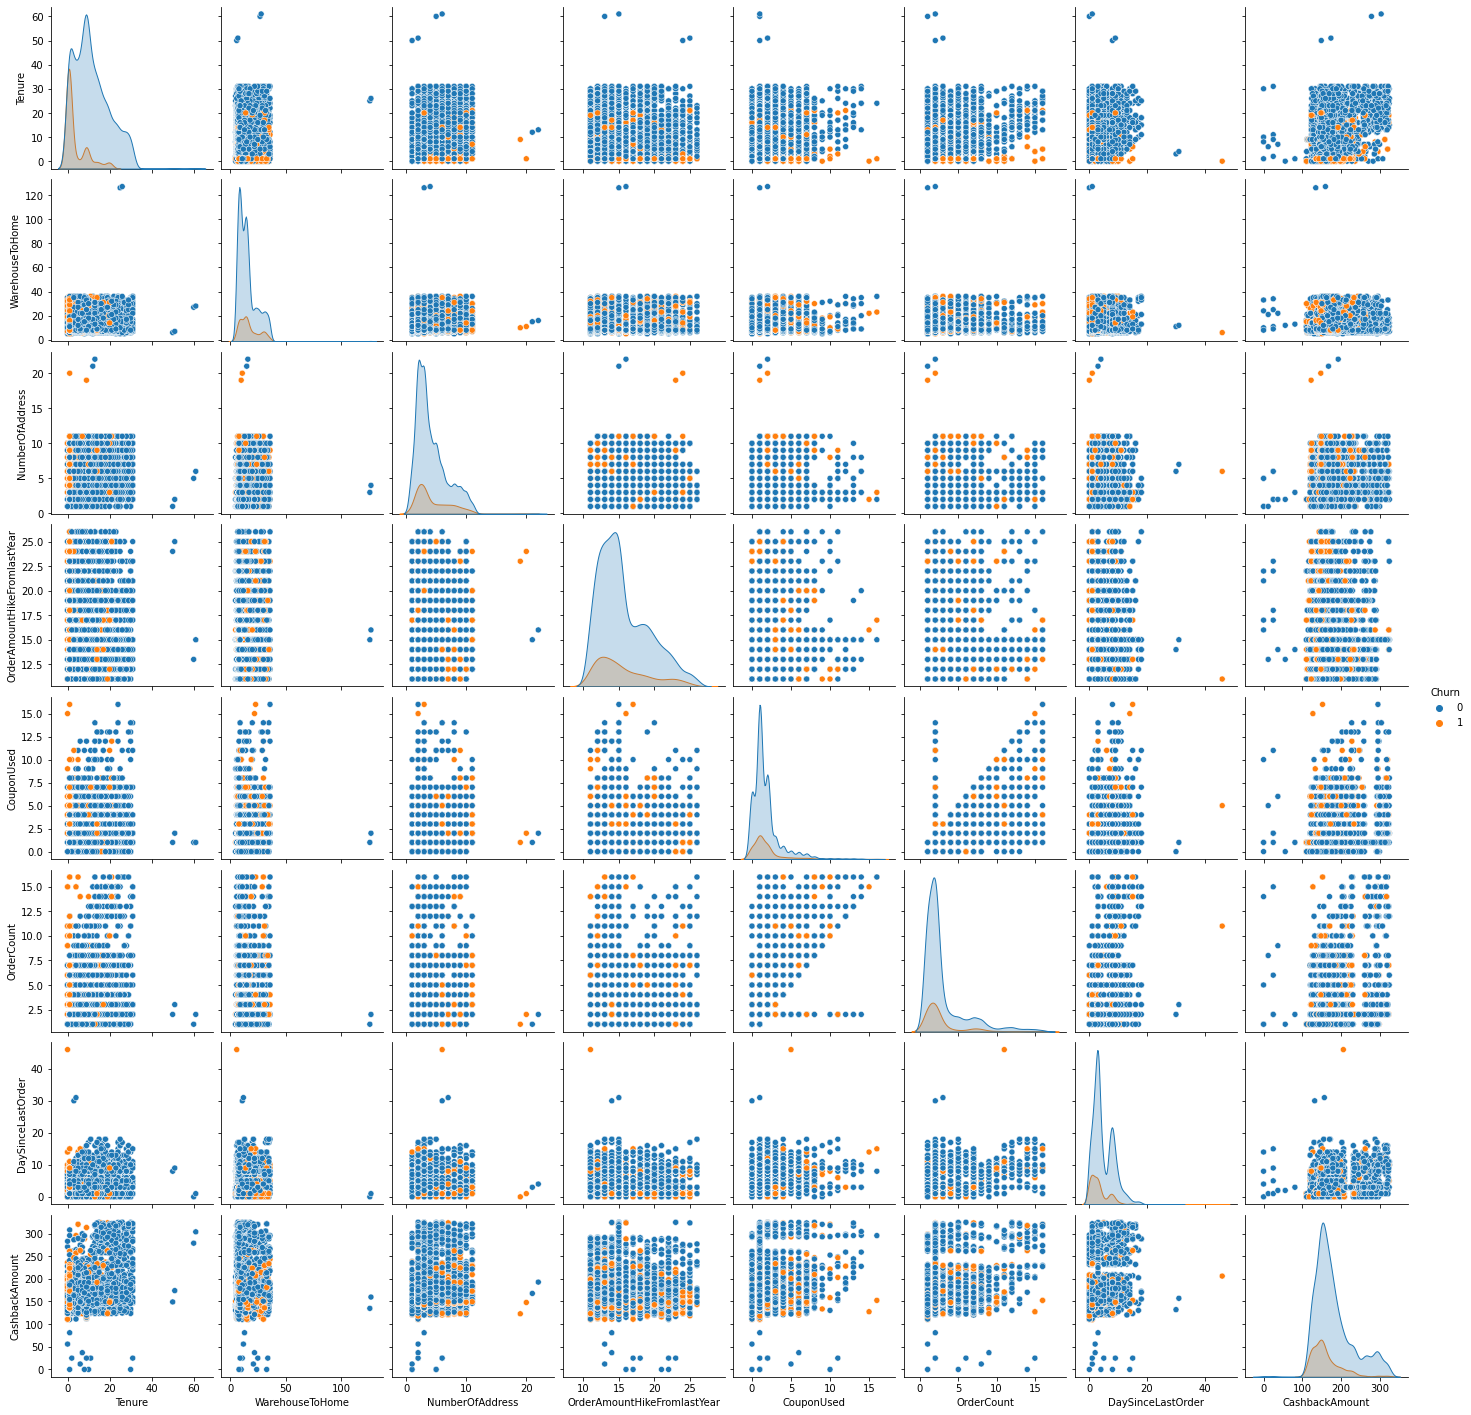

In [33]:
# pairplot (numerical variables)
cols = num[1:]
data = df[cols]

sns.pairplot(data, hue='Churn');

### Correlation Heatmaps

In [34]:
# for numerical variables
cols = num[2:]
data = df[cols]

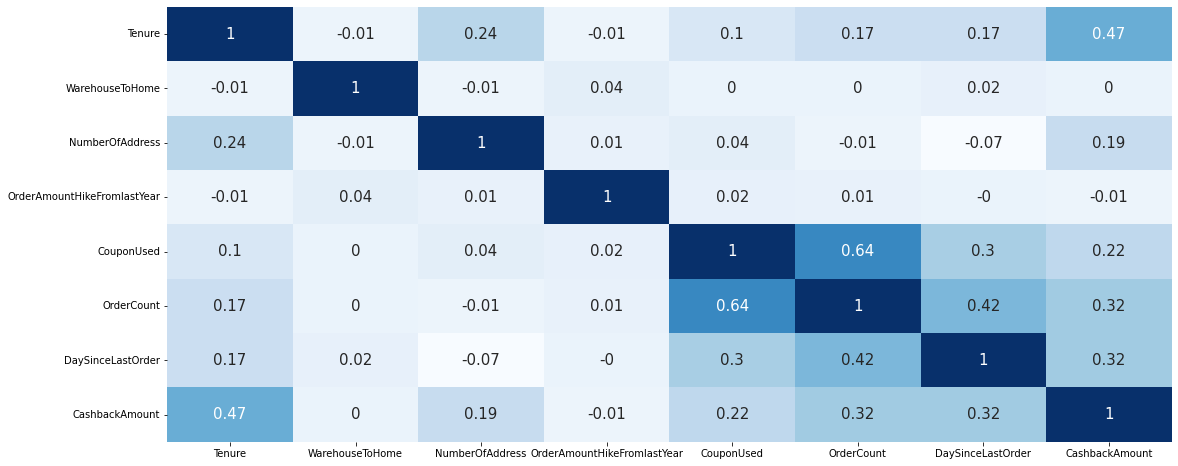

In [35]:
# data correlation
correlation =  np.round(data.corr(),2)

# heatmap configuration
plt.figure(figsize=(18,8))
sns.heatmap(correlation, annot=True, cmap='Blues', cbar=False, annot_kws={'fontsize':15})
plt.show()

In [36]:
# combining cat and obj variables
cvars = obj.copy()
cvars.extend(cat)

In [37]:
# for categorical variables
data = df[cvars]

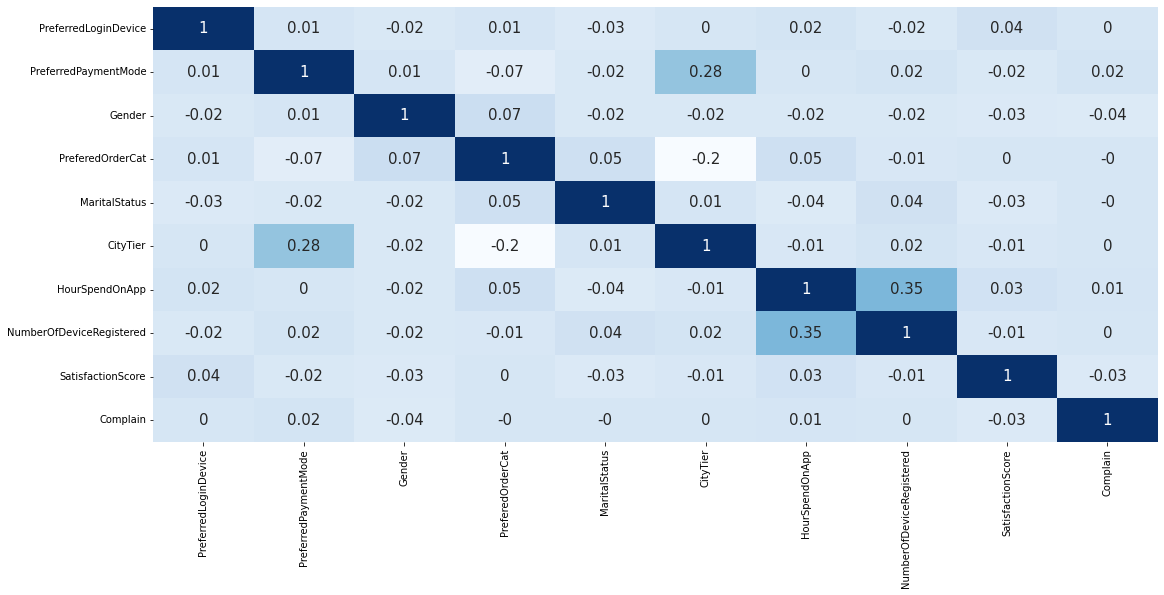

In [38]:
# data correlation
correlation =  np.round(data.corr(method='spearman'),2)

# heatmap configuration
plt.figure(figsize=(18,8))
sns.heatmap(correlation, annot=True, cmap='Blues', cbar=False, annot_kws={'fontsize':15})
plt.show()

### Observations

- High positive correlation exists between order count and coupons used variables which is 0.64. Other than that variables like tenure & cash back amount, number of device registered & hour spend on app have small correlation between them.
- Thus small correlation does not affect our prediction model very much.

### Modelling Prerequisites

In [39]:
# dependent and independent variables
x = df.drop(["CustomerID","Churn"], axis=1)
y = df["Churn"]

In [40]:
# train and test data splits
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [41]:
print("Train Data Size: {}".format(x_train.shape[0]))
print("Test Data Size: {}".format(x_test.shape[0]))
print("\n")
print("Train Target Class Proportion")
print("")
print(y_train.value_counts(normalize=True))

Train Data Size: 3941
Test Data Size: 1689


Train Target Class Proportion

0    0.828977
1    0.171023
Name: Churn, dtype: float64


### Random Forest Classifier

**Raw Approach**

In [42]:
model = RandomForestClassifier(random_state=0).fit(x_train,y_train)

In [43]:
# calculations
tr_pred = model.predict(x_train)
ts_pred = model.predict(x_test)

tr_score = round(accuracy_score(y_train,tr_pred),4)
ts_score = round(accuracy_score(y_test,ts_pred),4)

print("-----------------------")
print("Train Data: {}".format(tr_score))
print("Test Data : {}".format(ts_score))
print("-----------------------")

-----------------------
Train Data: 1.0
Test Data : 0.9609
-----------------------


**Grid Approach**

In [44]:
# performing grid search

model = RandomForestClassifier(random_state=0)
parameters = {'max_features':[10,13],
              'n_estimators':[200,300]}                   

grid = GridSearchCV(estimator=model, param_grid=parameters, cv=5).fit(x_train,y_train)
print(grid.best_params_)

{'max_features': 10, 'n_estimators': 300}


In [45]:
model = grid.best_estimator_.fit(x_train,y_train)

# calculations
tr_pred = model.predict(x_train)
ts_pred = model.predict(x_test)

tr_score = round(accuracy_score(y_train,tr_pred),4)
ts_score = round(accuracy_score(y_test,ts_pred),4)

print("-----------------------")
print("Train Data: {}".format(tr_score))
print("Test Data : {}".format(ts_score))
print("-----------------------")

-----------------------
Train Data: 1.0
Test Data : 0.9621
-----------------------


**Cross Validation**

In [46]:
# selective model
model = RandomForestClassifier(max_features=10, n_estimators=300, random_state=0)

In [47]:
# static method for model evaluation
def evaluate_model(x,y,repeats):
    cross_validator = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=0)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cross_validator, n_jobs=-1)
    return scores

In [48]:
# accuracy computation
results = []
repeats = np.arange(1,11)

for i in repeats:
    value = evaluate_model(x,y,i)
    results.append(value)

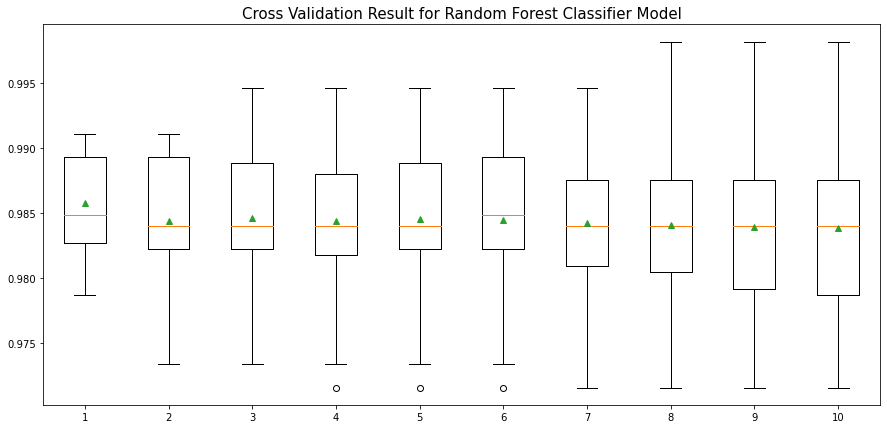

In [49]:
rcParams['figure.figsize'] = (15,7)
plt.boxplot(results, labels=[str(i) for i in repeats], showmeans=True)
plt.title('Cross Validation Result for Random Forest Classifier Model', fontsize=15)
plt.show()

**Random Forest Model with best parameters and cross validation with 9 repeats give a good accuracy with minimum variance.**

In [50]:
# final cross-validated score
cv = RepeatedKFold(n_splits=10, n_repeats=9, random_state=0)
score = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [51]:
rf_score = np.round(score.mean(),4)
print('Overall Accuracy: {}'.format(rf_score))

Overall Accuracy: 0.9839


--------

### Bagging Classifier

**Raw Approach**

In [52]:
model = BaggingClassifier(random_state=0).fit(x_train,y_train)

In [53]:
# calculations
tr_pred = model.predict(x_train)
ts_pred = model.predict(x_test)

tr_score = round(accuracy_score(y_train,tr_pred),4)
ts_score = round(accuracy_score(y_test,ts_pred),4)

print("-----------------------")
print("Train Data: {}".format(tr_score))
print("Test Data : {}".format(ts_score))
print("-----------------------")

-----------------------
Train Data: 0.9959
Test Data : 0.9526
-----------------------


**Grid Approach**

In [54]:
# performing grid search

model = BaggingClassifier(bootstrap_features=True, random_state=0)
parameters = {'max_features':[10,15],
              'n_estimators':[75,100]}                   

grid = GridSearchCV(estimator=model, param_grid=parameters, cv=5).fit(x_train,y_train)
print(grid.best_params_)

{'max_features': 15, 'n_estimators': 100}


In [55]:
model = grid.best_estimator_.fit(x_train,y_train)

# calculations
tr_pred = model.predict(x_train)
ts_pred = model.predict(x_test)

tr_score = round(accuracy_score(y_train,tr_pred),4)
ts_score = round(accuracy_score(y_test,ts_pred),4)

print("-----------------------")
print("Train Data: {}".format(tr_score))
print("Test Data : {}".format(ts_score))
print("-----------------------")

-----------------------
Train Data: 1.0
Test Data : 0.9586
-----------------------


**Cross Validation**

In [56]:
# selective model
model = BaggingClassifier(bootstrap_features=True, max_features=15,
                          n_estimators=100, random_state=0)

In [57]:
# accuracy computation
results = []
repeats = np.arange(1,11)

for i in repeats:
    value = evaluate_model(x,y,i)
    results.append(value)

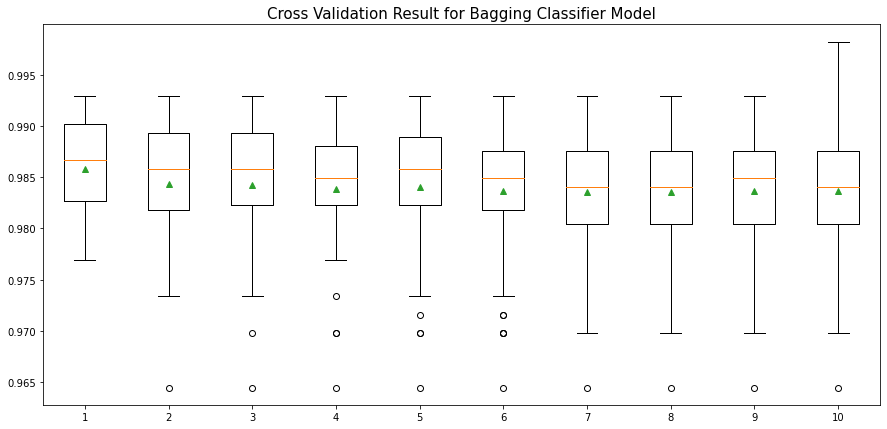

In [58]:
rcParams['figure.figsize'] = (15,7)
plt.boxplot(results, labels=[str(i) for i in repeats], showmeans=True)
plt.title('Cross Validation Result for Bagging Classifier Model', fontsize=15)
plt.show()

**Bagging Model with best parameters and cross validation with 10 repeats give a good accuracy with minimum variance.**

In [59]:
# final cross-validated score
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=0)
score = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [60]:
bg_score = np.round(score.mean(),4)
print('Overall Accuracy: {}'.format(bg_score))

Overall Accuracy: 0.9837


---

### Adaptive Boosting Classifier

**Raw Approach**

In [61]:
model = AdaBoostClassifier(base_estimator=RandomForestClassifier(), random_state=0).fit(x_train,y_train)

In [62]:
# calculations
tr_pred = model.predict(x_train)
ts_pred = model.predict(x_test)

tr_score = round(accuracy_score(y_train,tr_pred),4)
ts_score = round(accuracy_score(y_test,ts_pred),4)

print("-----------------------")
print("Train Data: {}".format(tr_score))
print("Test Data : {}".format(ts_score))
print("-----------------------")

-----------------------
Train Data: 1.0
Test Data : 0.9633
-----------------------


**Grid Approach**

In [63]:
# performing grid search

model = AdaBoostClassifier(base_estimator=RandomForestClassifier(), random_state=0)
parameters = {'learning_rate':[0.01,0.1],
              'n_estimators':[25,50]}                   

grid = GridSearchCV(estimator=model, param_grid=parameters, cv=5).fit(x_train,y_train)
print(grid.best_params_)

{'learning_rate': 0.01, 'n_estimators': 25}


In [64]:
model = grid.best_estimator_.fit(x_train,y_train)

# calculations
tr_pred = model.predict(x_train)
ts_pred = model.predict(x_test)

tr_score = round(accuracy_score(y_train,tr_pred),4)
ts_score = round(accuracy_score(y_test,ts_pred),4)

print("-----------------------")
print("Train Data: {}".format(tr_score))
print("Test Data : {}".format(ts_score))
print("-----------------------")

-----------------------
Train Data: 1.0
Test Data : 0.9633
-----------------------


**Cross Validation**

In [65]:
model = AdaBoostClassifier(base_estimator=RandomForestClassifier(), random_state=0)

In [66]:
# accuracy computation
results = []
repeats = np.arange(1,11)

for i in repeats:
    value = evaluate_model(x,y,i)
    results.append(value)

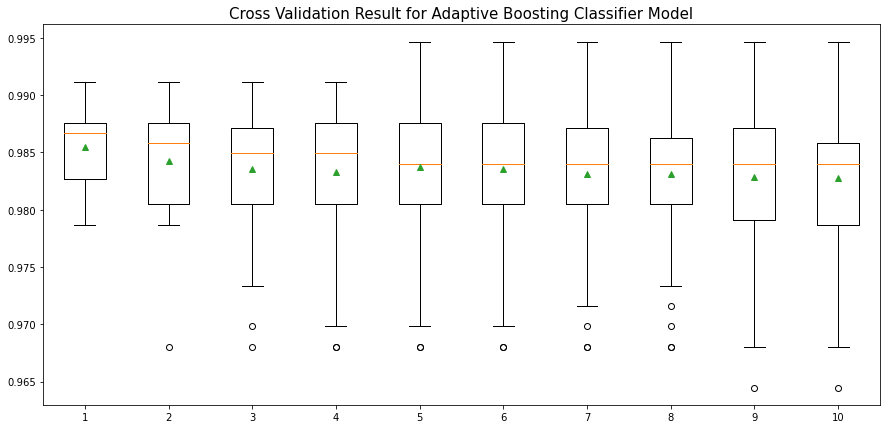

In [67]:
rcParams['figure.figsize'] = (15,7)
plt.boxplot(results, labels=[str(i) for i in repeats], showmeans=True)
plt.title('Cross Validation Result for Adaptive Boosting Classifier Model', fontsize=15)
plt.show()

**Adaptive Boosting Model with best parameters and cross validation with 5 repeats give a good accuracy with minimum variance.**

In [68]:
# final cross-validated score
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=0)
score = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [69]:
bs_score = np.round(score.mean(),4)
print('Overall Accuracy: {}'.format(bs_score))

Overall Accuracy: 0.9837


---

### Models Comparison

In [70]:
data = {'Test Accuracy':[0.9621, 0.9586, 0.9633],
        'CV Accuracy':[rf_score, bg_score, bs_score]}
index = ['Ranfom Forest', 'Bagging Model', 'Adaptive Boosting']
cmp = pd.DataFrame(data, index=index)
print(cmp)

                   Test Accuracy  CV Accuracy
Ranfom Forest             0.9621       0.9839
Bagging Model             0.9586       0.9837
Adaptive Boosting         0.9633       0.9837
